# Instructions to run

Copy `fakenews_data.csv` into your google drive root folder,
The notebook will ask for some permissions to read and write to google drive grant it


In [9]:
# import pandas as pd
# from google.colab import drive

# data = pd.read_csv("fakenews_data.csv")
# data.head()[0:20]

# for col in data: print(col)
# data.describe()

# # separating according to polarity

# data_fake = data[data["Polarity"] == "Fake"]
# data_fake.to_csv("data_fake", encoding  = "utf-8")


# data_real = data[data["Polarity"] == "TRUE"]
# data_real.to_csv("data_real", encoding  = "utf-8")

In [10]:
# json_dict = data.to_json('/tmp/fakenews_data.json', orient='records', lines=True)

In [11]:
# from google.colab import auth
# auth.authenticate_user()
# from googleapiclient.discovery import build
# drive_service = build('drive', 'v3')
# from googleapiclient.http import MediaFileUpload

# file_metadata = {
#     'name': 'fakenews_data.json',
#     'mimeType': 'application/json'
# }
# media = MediaFileUpload('/tmp/fakenews_data.json',
#                         mimetype='application/json',
#                         resumable=True)
# created = drive_service.files().create(body=file_metadata,
#                                        media_body=media,
#                                        fields='id').execute()
# print('File ID: {}'.format(created.get('id')))


In [12]:
# pip install git+https://github.com/alberto-lorente/text_characterization_toolkit.git@main

In [13]:
# from text_characterization.analysis import (
#     show_pairwise_metric_correlations,
#     PredictFromCharacteristicsAnalysis,
# )
# from text_characterization.utils import load_text_metrics

In [14]:
#outcomes_df = pd.read_json(
 #   f"{drive_path}/fakenews_data.json",
  #  lines=True,
   # orient="records"
#).set_index("id")
#outcomes_df = outcomes_df.rename(columns={"outcome": "Model Accuracy"})
#outcomes_df

FAKE DISTRIBUTIONS 
 [[<Axes: title={'center': 'id'}> <Axes: title={'center': 'DESPC'}>
  <Axes: title={'center': 'DESSC'}> <Axes: title={'center': 'DESWC'}>
  <Axes: title={'center': 'DESPL'}> <Axes: title={'center': 'DESPLd'}>
  <Axes: title={'center': 'DESPLw'}> <Axes: title={'center': 'DESSL'}>]
 [<Axes: title={'center': 'DESSLd'}> <Axes: title={'center': 'DESWLsy'}>
  <Axes: title={'center': 'DESWLsyd'}>
  <Axes: title={'center': 'DESWLlt'}>
  <Axes: title={'center': 'DESWLltd'}> <Axes: title={'center': 'LDTTRc'}>
  <Axes: title={'center': 'LDTTRa'}> <Axes: title={'center': 'LDMTLD'}>]
 [<Axes: title={'center': 'LDHDD'}> <Axes: title={'center': 'SYNLE'}>
  <Axes: title={'center': 'SYNNP'}> <Axes: title={'center': 'SYNMEDpos'}>
  <Axes: title={'center': 'SYNMEDwrd'}>
  <Axes: title={'center': 'SYNMEDlem'}>
  <Axes: title={'center': 'SYNSTRUTa'}>
  <Axes: title={'center': 'SYNSTRUTt'}>]
 [<Axes: title={'center': 'RDFRE'}> <Axes: title={'center': 'READFKGL'}>
  <Axes: title={'center'

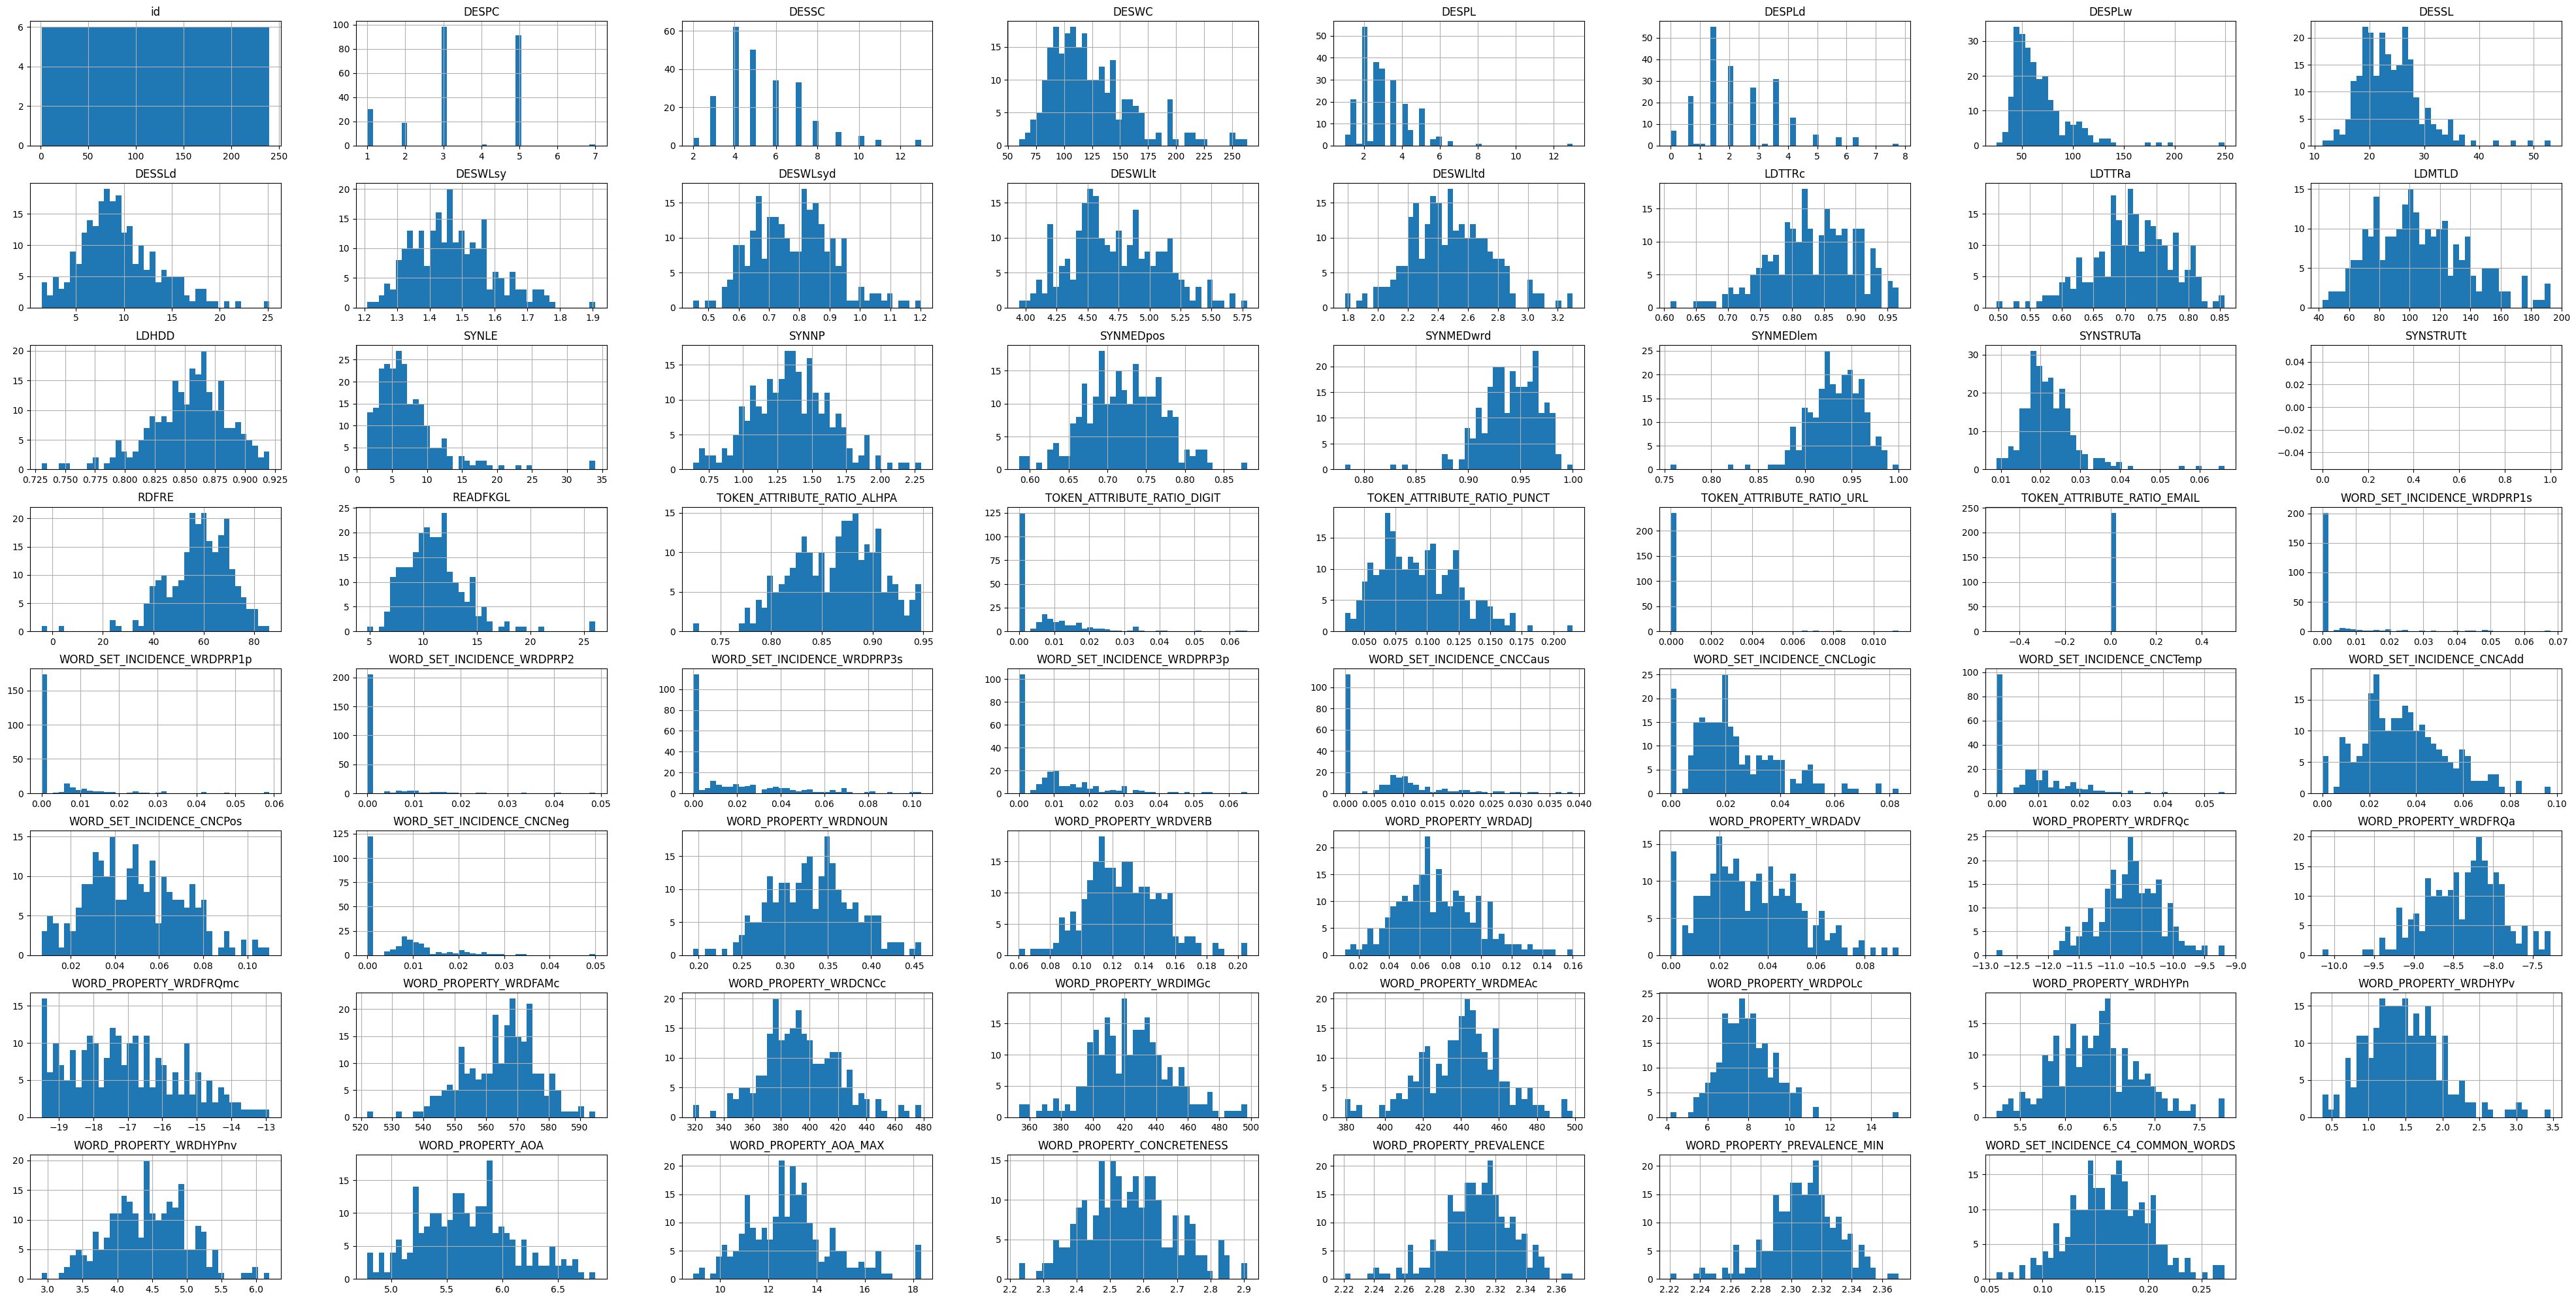

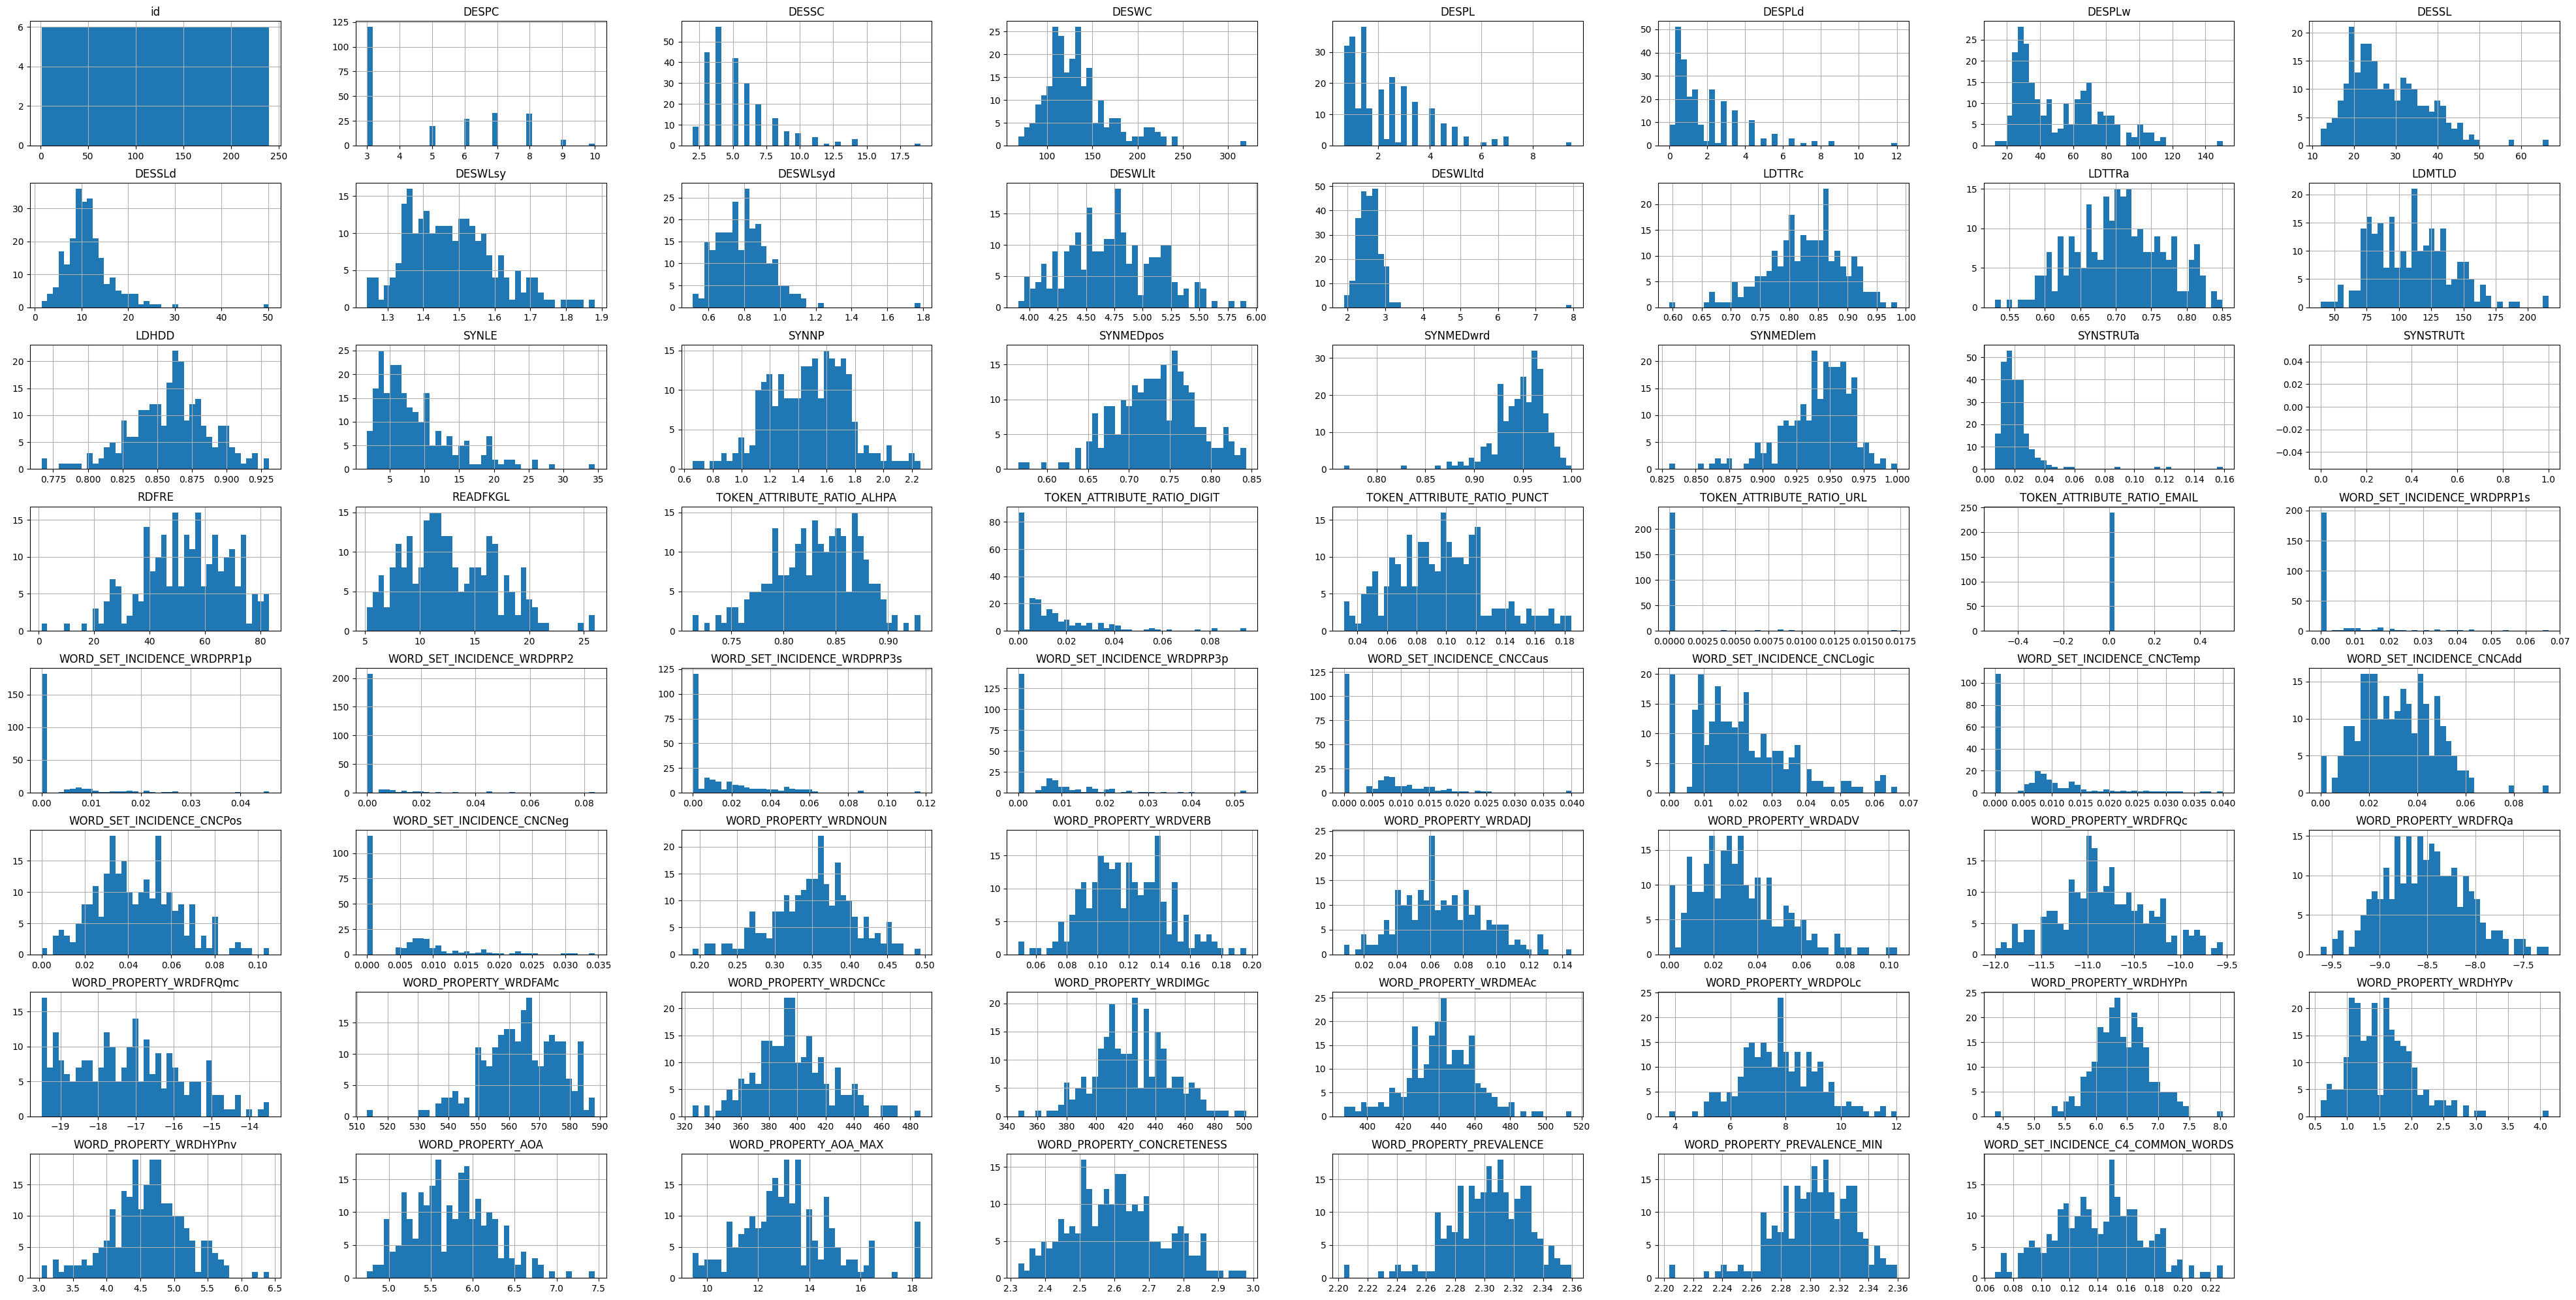

In [15]:
#separating our data frame acc to fake/new
import json
import pandas as pd
import numpy as np
from scipy import stats

fake_df = pd.read_table('fake.tsv', delimiter = '\t')
true_df = pd.read_table('true.tsv', delimiter = '\t')

# print("FAKE \n ", fake_df.describe())
# print("TRUE \n ", true_df.describe())

print("FAKE DISTRIBUTIONS \n", fake_df.hist(bins=40, figsize=(50, 25)))


print("TRUE DISTRIBUTIONS \n",true_df.hist(bins=40, figsize=(50, 25)))


In [16]:
#normalizing data for the fake_news df

fake_df.pop("text_key")
true_df.pop("text_key")

fake_max_scaled = pd.DataFrame()
for column in fake_df.columns:
    fake_max_scaled[column] = fake_df[column]  / fake_df[column].abs().max()
# view normalized data

print(display(fake_max_scaled))

#normalizing data for the true_news df

true_max_scaled = pd.DataFrame()
for column in fake_df.columns:
    true_max_scaled[column] = true_df[column]  / true_df[column].abs().max()
# view normalized data

print(display(true_max_scaled))

,id,DESPC,DESSC,DESWC,DESPL,DESPLd,DESPLw,DESSL,DESSLd,DESWLsy,...,WORD_PROPERTY_WRDPOLc,WORD_PROPERTY_WRDHYPn,WORD_PROPERTY_WRDHYPv,WORD_PROPERTY_WRDHYPnv,WORD_PROPERTY_AOA,WORD_PROPERTY_AOA_MAX,WORD_PROPERTY_CONCRETENESS,WORD_PROPERTY_PREVALENCE,WORD_PROPERTY_PREVALENCE_MIN,WORD_SET_INCIDENCE_C4_COMMON_WORDS
0,0.004167,0.714286,0.153846,0.372624,0.076923,0.000000,0.194779,0.924528,0.056157,1.000000,...,0.538941,0.753061,0.361111,0.675849,0.906467,0.689034,0.867591,0.977074,0.977074,0.751020
1,0.008333,0.428571,0.384615,0.479087,0.192308,0.272727,0.242972,0.475472,0.537464,0.673797,...,0.470487,0.760714,0.410526,0.510916,0.715784,0.644299,0.924187,0.977634,0.977634,0.408889
2,0.012500,0.428571,0.461538,0.501901,0.230769,0.363636,0.261044,0.415094,0.473851,0.706693,...,0.463789,0.827143,0.271895,0.718676,0.771628,0.638266,0.943055,0.975687,0.975687,0.641212
3,0.016667,0.428571,0.384615,0.532319,0.192308,0.272727,0.279116,0.528302,0.423043,0.703743,...,0.436888,0.825824,0.266667,0.741777,0.733323,0.560829,0.976361,0.959559,0.959559,0.499429
4,0.020833,0.428571,0.538462,0.520913,0.269231,0.454545,0.261044,0.369272,0.271124,0.684726,...,0.568799,0.876623,0.447778,0.696489,0.780503,0.803055,0.822267,0.965847,0.965847,0.644672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.983333,0.428571,0.230769,0.342205,0.115385,0.090909,0.178715,0.566038,0.105060,0.768627,...,0.493264,0.806494,0.375556,0.762626,0.850804,0.720676,0.867032,0.975971,0.975971,0.776889
236,0.987500,0.714286,0.384615,0.353612,0.192308,0.272727,0.178715,0.350943,0.343430,0.788914,...,0.388839,0.743478,0.553704,0.720346,0.973792,0.902891,0.911566,0.975959,0.975959,0.553978
237,0.991667,0.714286,0.307692,0.296578,0.153846,0.181818,0.154618,0.367925,0.279846,0.765940,...,0.482972,0.748052,0.577778,0.761160,0.822502,0.794326,0.911761,0.973115,0.973115,0.330256
238,0.995833,0.428571,0.307692,0.490494,0.153846,0.181818,0.257028,0.608491,0.319937,0.767815,...,0.440557,0.767281,0.529630,0.778013,0.804352,0.609384,0.937334,0.991995,0.991995,0.656124


None


,id,DESPC,DESSC,DESWC,DESPL,DESPLd,DESPLw,DESSL,DESSLd,DESWLsy,...,WORD_PROPERTY_WRDPOLc,WORD_PROPERTY_WRDHYPn,WORD_PROPERTY_WRDHYPv,WORD_PROPERTY_WRDHYPnv,WORD_PROPERTY_AOA,WORD_PROPERTY_AOA_MAX,WORD_PROPERTY_CONCRETENESS,WORD_PROPERTY_PREVALENCE,WORD_PROPERTY_PREVALENCE_MIN,WORD_SET_INCIDENCE_C4_COMMON_WORDS
0,0.004167,0.7,0.210526,0.356250,0.105263,0.067924,0.184385,0.428571,0.366738,0.811682,...,0.473169,0.831369,0.692641,0.789269,0.777670,0.697763,0.842451,0.960702,0.960702,0.729167
1,0.008333,0.3,0.368421,0.581250,0.368421,0.176471,0.568106,0.399570,0.418424,0.717633,...,0.692503,0.882492,0.418733,0.678259,0.681027,0.630660,0.812500,0.979277,0.979277,0.729167
2,0.012500,0.3,1.000000,1.000000,1.000000,1.000000,1.000000,0.253265,0.218021,0.706286,...,0.797496,0.783582,0.172043,0.601887,0.671458,0.729405,0.820413,0.981652,0.981652,0.697266
3,0.016667,0.9,0.315789,0.331250,0.126316,0.069601,0.135548,0.265664,0.105148,0.887992,...,0.460838,0.695387,0.484848,0.685293,0.827535,0.736498,0.893361,0.987858,0.987858,0.371462
4,0.020833,0.3,0.368421,0.375000,0.368421,0.294118,0.382060,0.257787,0.207136,0.740077,...,0.694546,0.737055,0.499109,0.691201,0.701328,0.636661,0.903335,0.987287,0.987287,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.983333,0.3,0.263158,0.428125,0.263158,0.176471,0.441860,0.412030,0.188227,0.741403,...,0.751685,0.774971,0.502165,0.744725,0.742271,0.643024,0.904619,0.971503,0.971503,0.734489
236,0.987500,0.9,0.210526,0.409375,0.084211,0.037203,0.168771,0.492481,0.401799,0.661695,...,0.824480,0.751676,0.199643,0.596560,0.670981,0.651391,0.873619,0.982905,0.982905,0.567748
237,0.991667,0.5,0.105263,0.293750,0.070175,0.048029,0.203765,0.706767,0.028169,0.780716,...,0.734176,0.814111,0.383838,0.747706,0.763879,0.797600,0.958591,0.979359,0.979359,0.465426
238,0.995833,0.3,0.526316,0.621875,0.526316,0.352941,0.614618,0.299248,0.212142,0.726871,...,0.781860,0.768479,0.142602,0.634251,0.670378,0.703219,0.882113,0.980088,0.980088,0.395729


None


In [17]:
true_max_scaled.transpose()  #for visual reference

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
id,0.004167,0.008333,0.012500,0.016667,0.020833,0.025000,0.029167,0.033333,0.037500,0.041667,...,0.962500,0.966667,0.970833,0.975000,0.979167,0.983333,0.987500,0.991667,0.995833,1.000000
DESPC,0.700000,0.300000,0.300000,0.900000,0.300000,0.300000,0.800000,0.300000,0.700000,0.500000,...,0.300000,1.000000,0.700000,0.800000,0.900000,0.300000,0.900000,0.500000,0.300000,0.300000
DESSC,0.210526,0.368421,1.000000,0.315789,0.368421,0.368421,0.368421,0.315789,0.210526,0.210526,...,0.421053,0.210526,0.263158,0.210526,0.263158,0.263158,0.210526,0.105263,0.526316,0.263158
DESWC,0.356250,0.581250,1.000000,0.331250,0.375000,0.431250,0.346875,0.409375,0.396875,0.353125,...,0.490625,0.418750,0.350000,0.465625,0.406250,0.428125,0.409375,0.293750,0.621875,0.300000
DESPL,0.105263,0.368421,1.000000,0.126316,0.368421,0.368421,0.184211,0.315789,0.105263,0.140351,...,0.421053,0.084211,0.175439,0.105263,0.131579,0.263158,0.084211,0.070175,0.526316,0.263158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WORD_PROPERTY_AOA_MAX,0.697763,0.630660,0.729405,0.736498,0.636661,0.681942,0.806328,0.724495,0.696127,0.631751,...,0.824877,0.624659,0.794326,0.755046,0.734861,0.643024,0.651391,0.797600,0.703219,0.715221
WORD_PROPERTY_CONCRETENESS,0.842451,0.812500,0.820413,0.893361,0.903335,0.881469,0.936609,0.834233,0.904162,0.887871,...,0.859208,0.857117,0.939969,0.851954,0.966056,0.904619,0.873619,0.958591,0.882113,0.882510
WORD_PROPERTY_PREVALENCE,0.960702,0.979277,0.981652,0.987858,0.987287,0.944099,0.967007,0.970711,0.990122,0.981464,...,0.973851,0.980614,0.991033,0.965104,0.988718,0.971503,0.982905,0.979359,0.980088,0.974674
WORD_PROPERTY_PREVALENCE_MIN,0.960702,0.979277,0.981652,0.987858,0.987287,0.944099,0.967007,0.970711,0.990122,0.981464,...,0.973851,0.980614,0.991033,0.965104,0.988718,0.971503,0.982905,0.979359,0.980088,0.974674


In [ ]:
#shapiro test indicates the probability of a distribution following normal curve

arrays_true = true_max_scaled.transpose()
arrays_fake = fake_max_scaled.transpose()

dic_arrays_true = {}
dic_arrays_fake = {}
shapiro_pvalue_fake = []
shapiro_pvalue_true = []

for i in range(len(arrays_true)):

  dic_arrays_true["array{}".format(i)] = np.array(arrays_true.iloc[i])  #i dont think it is necesay to convert to np array since im already doing the iloc but still did it in case
  res = stats.shapiro(dic_arrays_true["array{}".format(i)])
  shapiro_pvalue_true.append(res.pvalue)
  #if res.pvalue >= 0.05:
  # print("shapiro true:", res.pvalue)
  #print(shapiro_pvalue_true)


for i in range(len(arrays_fake)):

  dic_arrays_fake["array{}".format(i)] = np.array(arrays_fake.iloc[i])  #i dont think it is necesay to convert to np array since im already doing the iloc but still did it in case
  res = stats.shapiro(dic_arrays_fake["array{}".format(i)])
  #print("shapiro fake:", res.pvalue)
  shapiro_pvalue_fake.append(res.pvalue)

#comparing shapiro tests for fake-true can tell us which features follow a normal distribution in fake news, which features follow normal distribution in real news

for i in range(len(shapiro_pvalue_true)):
  print("for shapiro test in index {}: shapiro fake".format(i), shapiro_pvalue_fake[i], "vs shapiro true", shapiro_pvalue_true[i])

In [59]:
# checking the indexes are the same

# print(arrays_fake.iloc[0])

# print(dic_arrays_true["array0"])

0      0.004167
1      0.008333
2      0.012500
3      0.016667
4      0.020833
         ...   
235    0.983333
236    0.987500
237    0.991667
238    0.995833
239    1.000000
Name: id, Length: 240, dtype: float64
[0.00416667 0.00833333 0.0125     0.01666667 0.02083333 0.025
 0.02916667 0.03333333 0.0375     0.04166667 0.04583333 0.05
 0.05416667 0.05833333 0.0625     0.06666667 0.07083333 0.075
 0.07916667 0.08333333 0.0875     0.09166667 0.09583333 0.1
 0.10416667 0.10833333 0.1125     0.11666667 0.12083333 0.125
 0.12916667 0.13333333 0.1375     0.14166667 0.14583333 0.15
 0.15416667 0.15833333 0.1625     0.16666667 0.17083333 0.175
 0.17916667 0.18333333 0.1875     0.19166667 0.19583333 0.2
 0.20416667 0.20833333 0.2125     0.21666667 0.22083333 0.225
 0.22916667 0.23333333 0.2375     0.24166667 0.24583333 0.25
 0.25416667 0.25833333 0.2625     0.26666667 0.27083333 0.275
 0.27916667 0.28333333 0.2875     0.29166667 0.29583333 0.3
 0.30416667 0.30833333 0.3125     0.31666667 0.3208

In [52]:



# for col in true_max_scaled.columns:
#     print(col)

listaza = '''id
DESPC
DESSC
DESWC
DESPL
DESPLd
DESPLw
DESSL
DESSLd
DESWLsy
DESWLsyd
DESWLlt
DESWLltd
LDTTRc
LDTTRa
LDMTLD
LDHDD
SYNLE
SYNNP
SYNMEDpos
SYNMEDwrd
SYNMEDlem
SYNSTRUTa
SYNSTRUTt
RDFRE
READFKGL
TOKEN_ATTRIBUTE_RATIO_ALHPA
TOKEN_ATTRIBUTE_RATIO_DIGIT
TOKEN_ATTRIBUTE_RATIO_PUNCT
TOKEN_ATTRIBUTE_RATIO_URL
TOKEN_ATTRIBUTE_RATIO_EMAIL
WORD_SET_INCIDENCE_WRDPRP1s
WORD_SET_INCIDENCE_WRDPRP1p
WORD_SET_INCIDENCE_WRDPRP2
WORD_SET_INCIDENCE_WRDPRP3s
WORD_SET_INCIDENCE_WRDPRP3p
WORD_SET_INCIDENCE_CNCCaus
WORD_SET_INCIDENCE_CNCLogic
WORD_SET_INCIDENCE_CNCTemp
WORD_SET_INCIDENCE_CNCAdd
WORD_SET_INCIDENCE_CNCPos
WORD_SET_INCIDENCE_CNCNeg
WORD_PROPERTY_WRDNOUN
WORD_PROPERTY_WRDVERB
WORD_PROPERTY_WRDADJ
WORD_PROPERTY_WRDADV
WORD_PROPERTY_WRDFRQc
WORD_PROPERTY_WRDFRQa
WORD_PROPERTY_WRDFRQmc
WORD_PROPERTY_WRDFAMc
WORD_PROPERTY_WRDCNCc
WORD_PROPERTY_WRDIMGc
WORD_PROPERTY_WRDMEAc
WORD_PROPERTY_WRDPOLc
WORD_PROPERTY_WRDHYPn
WORD_PROPERTY_WRDHYPv
WORD_PROPERTY_WRDHYPnv
WORD_PROPERTY_AOA
WORD_PROPERTY_AOA_MAX
WORD_PROPERTY_CONCRETENESS
WORD_PROPERTY_PREVALENCE
WORD_PROPERTY_PREVALENCE_MIN
WORD_SET_INCIDENCE_C4_COMMON_WORDS'''

dict_ids = {}

dic_list = []
for word in listaza.split():
  dic_list.append(word)

dict_fake_pvalues = {dic_list[i]: shapiro_pvalue_fake[i] for i in range(len(dic_list))}

dict_true_pvalues = {dic_list[i]: shapiro_pvalue_true[i] for i in range(len(dic_list))}


{'id': 7.521604743487842e-07, 'DESPC': 2.2636709875816473e-15, 'DESSC': 4.6990106250532904e-11, 'DESWC': 1.3493790806951012e-10, 'DESPL': 6.2246414179480385e-15, 'DESPLd': 1.0, 'DESPLw': 1.843573165399395e-16, 'DESSL': 1.4451300156537172e-09, 'DESSLd': 8.210371743189171e-05, 'DESWLsy': 0.003175197634845972, 'DESWLsyd': 0.04931962490081787, 'DESWLlt': 0.012443571351468563, 'DESWLltd': 0.34033891558647156, 'LDTTRc': 0.028112594038248062, 'LDTTRa': 0.05782588571310043, 'LDMTLD': 0.0012249655555933714, 'LDHDD': 0.00027692996081896126, 'SYNLE': 2.0117501012388583e-16, 'SYNNP': 0.5193821787834167, 'SYNMEDpos': 0.8795928359031677, 'SYNMEDwrd': 7.384870048809944e-09, 'SYNMEDlem': 3.0084251534390205e-08, 'SYNSTRUTa': 7.465420595348816e-15, 'SYNSTRUTt': 1.0, 'RDFRE': 5.291670959195471e-07, 'READFKGL': 2.707689072956043e-10, 'TOKEN_ATTRIBUTE_RATIO_ALHPA': 0.014554135501384735, 'TOKEN_ATTRIBUTE_RATIO_DIGIT': 6.103451023655109e-20, 'TOKEN_ATTRIBUTE_RATIO_PUNCT': 0.00014454057964030653, 'TOKEN_ATTRI

In [19]:
# now we have the two normalized data frames with the linguistic metrics acc to true/fake in the variables:

#     true_max_scaled

#     fake_max_scaled

#summary of the stats
stats_true = true_max_scaled.describe().transpose()
stats_fake = fake_max_scaled.describe().transpose()

#linguistic features as rows and stats as columns
print("True News Stats", "\n", stats_true.head())
print("Fake News Stats", "\n", stats_fake.head())

True News Stats 
        count      mean       std       min       25%       50%       75%  max
id     240.0  0.502083  0.289276  0.004167  0.253125  0.502083  0.751042  1.0
DESPC  240.0  0.492917  0.211766  0.300000  0.300000  0.400000  0.700000  1.0
DESSC  240.0  0.280921  0.133586  0.105263  0.210526  0.263158  0.315789  1.0
DESWC  240.0  0.418307  0.114311  0.212500  0.343750  0.396875  0.462500  1.0
DESPL  240.0  0.231528  0.155935  0.070175  0.105263  0.175439  0.315789  1.0
Fake News Stats 
        count      mean       std       min       25%       50%       75%  max
id     240.0  0.502083  0.289276  0.004167  0.253125  0.502083  0.751042  1.0
DESPC  240.0  0.492857  0.200631  0.142857  0.428571  0.428571  0.714286  1.0
DESSC  240.0  0.419231  0.155240  0.153846  0.307692  0.384615  0.538462  1.0
DESWC  240.0  0.472006  0.140855  0.228137  0.371673  0.442966  0.543726  1.0
DESPL  240.0  0.231704  0.105277  0.076923  0.153846  0.192308  0.269231  1.0
